Observations

1 - The max temperature appeared to be warmer near the equator, as predicted.  I found it iteresting that I had more plots north of the equator, so I looked it up and discovered that 90% of the world population is north of the equator.

2 - There does not seem to be a relationship between cloudiness, humidity, or wind speed and city latitude.

3 - I also find it interesting that the closer you get to the north pole there appears to be heavy cloud coverage.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cloudiness = []
country = []
date = []          
humidity = []      
lat = []           
lng = []           
max_temp = []      
wind_speed = []
city_name = []
request_count = 0
set_number = 1

In [4]:
for city in cities:    
    if request_count != 50:
        request_count += 1
        print(f"Processing record {request_count} of set {set_number} - {city}")
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        response = requests.get(query_url)
        weather_json = response.json()
        try:
            city_name.append(weather_json["name"])
            max_temp.append(weather_json["main"]["temp_max"])
            wind_speed.append(weather_json["wind"]["speed"])
            cloudiness.append(weather_json["clouds"]["all"])
            country.append(weather_json["sys"]["country"])
            date.append(weather_json["dt"])          
            humidity.append(weather_json["main"]["humidity"])      
            lat.append(weather_json["coord"]["lat"])           
            lng.append(weather_json["coord"]["lon"])
        except KeyError:
            print("City not found. Skipping ...")
    else:
        time.sleep(65)
        set_number += 1
        request_count = 0

Processing record 1 of set 1 - klaksvik
Processing record 2 of set 1 - nikolskoye
Processing record 3 of set 1 - port alfred
Processing record 4 of set 1 - ushuaia
Processing record 5 of set 1 - kalcheva
Processing record 6 of set 1 - carnarvon
Processing record 7 of set 1 - punta arenas
Processing record 8 of set 1 - ponta do sol
Processing record 9 of set 1 - mildura
Processing record 10 of set 1 - evensk
Processing record 11 of set 1 - busselton
Processing record 12 of set 1 - port elizabeth
Processing record 13 of set 1 - lebu
Processing record 14 of set 1 - andenes
City not found. Skipping ...
Processing record 15 of set 1 - tuktoyaktuk
Processing record 16 of set 1 - beibei
Processing record 17 of set 1 - mataura
Processing record 18 of set 1 - cabo san lucas
Processing record 19 of set 1 - garhakota
Processing record 20 of set 1 - new norfolk
Processing record 21 of set 1 - belushya guba
City not found. Skipping ...
Processing record 22 of set 1 - sakakah
City not found. Skippin

Processing record 36 of set 4 - juneau
Processing record 37 of set 4 - chhapar
Processing record 38 of set 4 - surt
Processing record 39 of set 4 - mahebourg
Processing record 40 of set 4 - tumannyy
City not found. Skipping ...
Processing record 41 of set 4 - menongue
Processing record 42 of set 4 - bonthe
Processing record 43 of set 4 - provideniya
Processing record 44 of set 4 - puerto pinasco
City not found. Skipping ...
Processing record 45 of set 4 - amapa
Processing record 46 of set 4 - kerki
City not found. Skipping ...
Processing record 47 of set 4 - tari
Processing record 48 of set 4 - ketchikan
Processing record 49 of set 4 - marcona
City not found. Skipping ...
Processing record 50 of set 4 - butaritari
Processing record 1 of set 5 - bukoba
Processing record 2 of set 5 - nortelandia
Processing record 3 of set 5 - rawson
Processing record 4 of set 5 - abu dhabi
Processing record 5 of set 5 - vila do maio
Processing record 6 of set 5 - gawler
Processing record 7 of set 5 - lan

Processing record 21 of set 8 - kasongo-lunda
Processing record 22 of set 8 - aflu
City not found. Skipping ...
Processing record 23 of set 8 - sumbawanga
Processing record 24 of set 8 - victoria
Processing record 25 of set 8 - noumea
Processing record 26 of set 8 - verkhnyaya inta
Processing record 27 of set 8 - nemuro
Processing record 28 of set 8 - el badari
City not found. Skipping ...
Processing record 29 of set 8 - novobiryusinskiy
Processing record 30 of set 8 - buchanan
Processing record 31 of set 8 - mackay
Processing record 32 of set 8 - hayden
Processing record 33 of set 8 - zyryanovsk
Processing record 34 of set 8 - kuala terengganu
Processing record 35 of set 8 - kokopo
Processing record 36 of set 8 - iskateley
Processing record 37 of set 8 - ewa beach
Processing record 38 of set 8 - sheridan
Processing record 39 of set 8 - urucara
Processing record 40 of set 8 - along
Processing record 41 of set 8 - kazalinsk
City not found. Skipping ...
Processing record 42 of set 8 - la

City not found. Skipping ...
Processing record 5 of set 12 - luce
Processing record 6 of set 12 - genhe
Processing record 7 of set 12 - kisangani
Processing record 8 of set 12 - kargasok
Processing record 9 of set 12 - allanridge
Processing record 10 of set 12 - berdigestyakh
Processing record 11 of set 12 - forbes
Processing record 12 of set 12 - de-kastri
Processing record 13 of set 12 - sabang
Processing record 14 of set 12 - tieli
Processing record 15 of set 12 - katangli
Processing record 16 of set 12 - velyka bilozerka
Processing record 17 of set 12 - ovsyanka
Processing record 18 of set 12 - altamira
Processing record 19 of set 12 - imeni poliny osipenko
Processing record 20 of set 12 - penzance
Processing record 21 of set 12 - enshi
Processing record 22 of set 12 - dinghai
Processing record 23 of set 12 - caceres
Processing record 24 of set 12 - olinda
Processing record 25 of set 12 - tigzirt
Processing record 26 of set 12 - kalaleh
Processing record 27 of set 12 - ampanihy
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_df = pd.DataFrame(
    {'City': city_name,
     'Cloudiness': cloudiness,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Latitude': lat,
     'Longitude': lng,
     'Max Temperature (F)': max_temp,
     'Wind Speed': wind_speed,
    })
cols = ['Cloudiness', 'Date', 'Humidity', 'Latitude', 'Longitude', 'Max Temperature (F)', 'Wind Speed']
city_weather_df[cols] = city_weather_df[cols].applymap(np.float)
city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=False)
city_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 9 columns):
City                   516 non-null object
Cloudiness             516 non-null float64
Country                516 non-null object
Date                   516 non-null float64
Humidity               516 non-null float64
Latitude               516 non-null float64
Longitude              516 non-null float64
Max Temperature (F)    516 non-null float64
Wind Speed             516 non-null float64
dtypes: float64(7), object(2)
memory usage: 36.4+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

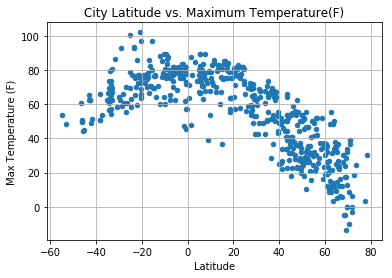

In [6]:
city_weather_df.plot.scatter("Latitude", "Max Temperature (F)", grid=True, title="City Latitude vs. Maximum Temperature(F)")
plt.savefig("Output/LatvTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

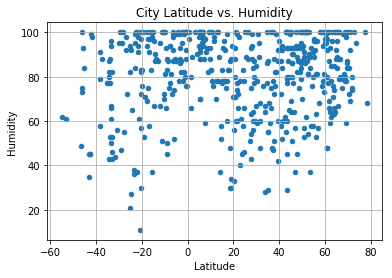

In [7]:
city_weather_df.plot.scatter("Latitude", "Humidity", grid=True, title="City Latitude vs. Humidity")
plt.savefig("Output/LatvHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

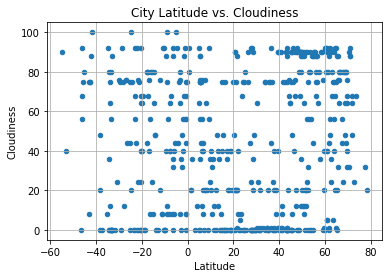

In [8]:
city_weather_df.plot.scatter("Latitude", "Cloudiness", grid=True, title="City Latitude vs. Cloudiness")
plt.savefig("Output/LatVCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

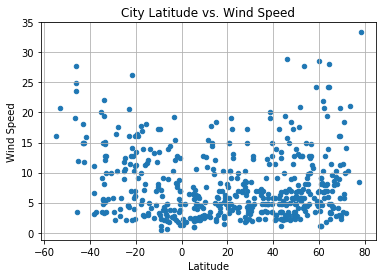

In [9]:
city_weather_df.plot.scatter("Latitude", "Wind Speed", grid=True, title="City Latitude vs. Wind Speed")
plt.savefig("Output/LatVWind.png")
plt.show()